In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

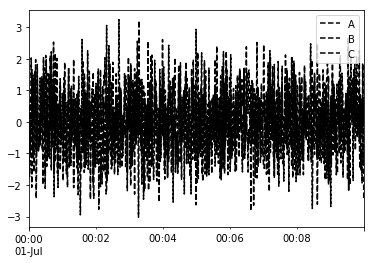

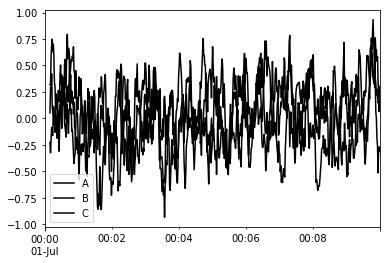

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\mdris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.386189,-0.278988,-0.961453
2016-07-01 00:00:02,-0.146347,0.043075,-1.145882
2016-07-01 00:00:03,-0.218169,0.243602,-0.743508
2016-07-01 00:00:04,-0.096665,0.102968,-0.032554
2016-07-01 00:00:05,-0.544988,0.457260,0.227031
2016-07-01 00:00:06,-0.396029,0.622708,0.240655
2016-07-01 00:00:07,-0.152512,0.291446,0.477708
2016-07-01 00:00:08,-0.004543,0.124759,0.389116
2016-07-01 00:00:09,-0.273102,-0.066485,0.552066


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.541965,0.160695,-0.425841,-1.783750
2016-06-07,1.684470,-1.416220,0.474083,-0.173498
2016-06-08,-1.384462,0.366975,-0.173846,-3.227119
2016-06-09,1.177011,0.312372,-0.164475,-1.250636
2016-06-10,1.344091,-0.181719,-0.223368,-0.307189


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001802AA3E4E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001802AB837B8>], dtype=object)

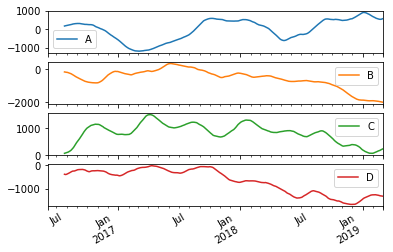

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.767238,1.125396,0.566690,1.939814


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.300270,-0.547415,-0.188799,-1.870499
2016-06-08,0.119528,-0.661127,-0.167734,-2.975122
2016-06-09,0.323409,-0.639890,-0.198320,-3.840092
2016-06-10,0.714557,-0.663492,-0.261346,-4.420513


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# More stable
# When might one vs. the other be appropriate?
# Expanding more appropriate if you are adding data to an existing data set

In [14]:
# EWMA
#Expanding window moving average
# Why use EWMA?
# See above

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting